<h2><center>Week 7: Learning (Part II, Intro to Neural Nets)</center></h2>

<h3><center>CSCI-UA 9473 - Introduction to Machine Learning</center></h3>

<font color='green'><h2>Partial Solutions</h2> </font>

### Part 1. A simple linearly separable dataset (gradient) 

In [4]:
# a simple neural network which takes as input a 1D latent variable

import numpy as np
import copy
import matplotlib.pyplot as plt


input_dim  = 2
output_dim = 1
# number of neurons per layer
network_size = [1]
total_size = copy.deepcopy(network_size)
total_size.append(output_dim)
num_layers = len(network_size)


In [8]:
# defining the activation function
def activation1(x):
    
    sigma = 1/(1+np.exp(-x))
    
    derivative = sigma*(1-sigma)
    
    return sigma, derivative

In [13]:
# forward and backward propagation

x_in = np.random.normal(0,1,(input_dim,1))

def SGD_neuralNet(x_in, target, weights, biases): 
    
    # forward propagation
    current_input = x_in

    # adding the bias term

    preactivation = []
    postactivation = []
    
    for l in np.arange(len(weights)):

        output_s = np.shape(weights[l])[1]
        
        tmp = np.matmul(weights[l],current_input).reshape(-1,1) \
        + biases[l].reshape(-1,1)
        
        tmp2 = activation1(tmp)[0]
        preactivation.append(tmp)
        postactivation.append(tmp2)
        current_output = tmp2
        current_input = current_output
        
    
    ### backpropagation 

    loss = -target*np.log(current_output) -(1-target)*np.log(1-current_output)
    delta_out = current_output - target
    current_delta = delta_out

    weight_backp = weights[::-1]
    preactivation_backp = preactivation[:-1][::-1]
    postactivation_backp = postactivation[:-1][::-1]

    grad = []
    grad_biases = []
    
    grad.append(np.squeeze(delta_out)*np.squeeze(postactivation_backp[0]))
    grad_biases.append(delta_out)
    
    
    postactivation_backp.append(x_in)

    for l in np.arange(len(weights)-1):

        tmp = np.matmul(weight_backp[l].T, current_delta)
        
        sigmaPrime = np.squeeze(activation1(preactivation_backp[l])[1])
        
        current_delta = np.multiply(tmp.reshape(-1,1),sigmaPrime.reshape(-1,1))
        
        tmp1 = postactivation_backp[l+1].reshape(-1,1).T
        tmp2 = np.matmul(np.squeeze(current_delta).reshape(-1,1), tmp1) 
        grad.append(np.squeeze(tmp2))
        
        grad_biases.append(np.squeeze(current_delta))
    
    grad = grad[::-1]
    grad_biases = grad_biases[::-1]
    
    return loss, current_output, grad, grad_biases

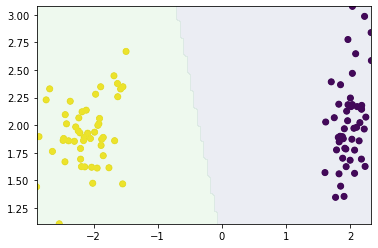

In [15]:
from sklearn.datasets import make_classification
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, class_sep=2, random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

data = X1
targets = Y1

# applying the gradient step 
x_in = data[0,:]
target = targets[0]
weights = []
biases = []

current_is = input_dim
current_os = network_size[0]
weights.append(np.random.normal(0,1,(current_os, current_is)))
biases.append(np.random.normal(0,1,(current_os,)))

# random initialization of weights
for l in np.arange(1,len(total_size)):
    
    current_is = current_os
    current_os = total_size[l]
    weights.append(np.random.normal(0,1,(current_os, current_is)))
    biases.append(np.random.normal(0,1,(current_os, 1)))

# learning rate
# learning rate
eta = .01

num_epochs = 2000
total_loss = np.zeros(num_epochs)

for e in range(num_epochs):
    
    # random swapping 
    indices_epoch = np.arange(np.shape(data)[0])
    np.random.shuffle(indices_epoch)
    data_epoch = data[indices_epoch,:]
    target_epoch = targets[indices_epoch]
    
    # SGD
    
    grad_weights_tmp = []
    grad_biases_tmp = []
    
    for l in np.arange(len(weights)):
        grad_weights_tmp.append(np.zeros(np.shape(weights[l])))
        grad_biases_tmp.append(np.zeros(np.shape(biases[l])))
    
    for i in np.arange(len(target_epoch)):
        
        loss, f, g, b = SGD_neuralNet(data_epoch[i,:], target_epoch[i], weights, biases)
        
        total_loss[e] += loss 
        #one gradient step 
        
        
        for l in np.arange(len(weights)):
                
            grad_weights_tmp[l] = np.squeeze(grad_weights_tmp[l])+ np.squeeze(g[l])
            grad_biases_tmp[l] = np.squeeze(grad_biases_tmp[l]) + np.squeeze(b[l])
            
            
    for l in np.arange(len(weights)):
            
        weights[l] = weights[l] - (eta/len(target_epoch))*grad_weights_tmp[l] 
        biases[l] = biases[l].reshape(-1,1) - (eta/len(target_epoch))*grad_biases_tmp[l].reshape(-1,1)

    
    
        
        
        
        
x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1]) 
x2max = np.max(data[:,1])

xx1 = np.linspace(x1min, x1max, 100)
xx2 = np.linspace(x2min, x2max, 100)
xx1,xx2 = np.meshgrid(xx1, xx2)

data_grid = np.vstack((xx1.flatten(), xx2.flatten())).T

prediction = np.zeros((np.shape(data_grid)[0],1))

for sample in np.arange(np.shape(data_grid)[0]):
    
    prediction[sample,:] =  SGD_neuralNet(data_grid[sample,:], 0, weights, biases)[0]
    

plt.scatter(data[:,0], data[:,1], c = targets)
plt.contourf(xx1,xx2, np.reshape(prediction>0.5, np.shape(xx1)), levels=1, alpha = .1)
plt.show()


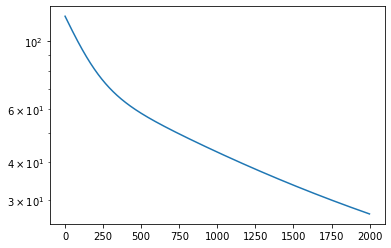

In [16]:
import matplotlib.pyplot as plt

plt.semilogy(total_loss)
plt.show()

### Part 2. The XOR Gate (gradient)

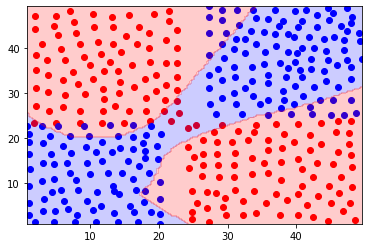

In [17]:
#

from scipy.io import loadmat
data1 = loadmat('neural_net_class1.mat')['neural_net_class1']
data2 = loadmat('neural_net_class2.mat')['neural_net_class2']

targets1 = np.ones((np.shape(data1)[0],1))
targets0 = np.zeros((np.shape(data2)[0],1))

targets = np.vstack((targets1, targets0))

data = np.vstack((data1, data2))

# applying the SGD step 

input_dim  = 2
output_dim = 1
# number of neurons per layer
network_size = [20,20]
total_size = copy.deepcopy(network_size)
total_size.append(output_dim)
num_layers = len(network_size)

weights = []
biases = []



current_is = input_dim
current_os = network_size[0]
weights.append(np.random.normal(0,1,(current_os, current_is)))
biases.append(np.random.normal(0,1,(current_os,)))

# random initialization of weights
for l in np.arange(1,len(total_size)):
    
    current_is = current_os
    current_os = total_size[l]
    weights.append(np.random.normal(0,1,(current_os, current_is)))
    biases.append(np.random.normal(0,1,(current_os, 1)))

# learning rate
eta = .01

num_epochs = 40000
total_loss = np.zeros(num_epochs)

for e in range(num_epochs):
    
    # random swapping 
    indices_epoch = np.arange(np.shape(data)[0])
    np.random.shuffle(indices_epoch)
    data_epoch = data[indices_epoch,:]
    target_epoch = targets[indices_epoch]
    
    # SGD
    
    grad_weights_tmp = []
    grad_biases_tmp = []
    
    for l in np.arange(len(weights)):
        grad_weights_tmp.append(np.zeros(np.shape(weights[l])))
        grad_biases_tmp.append(np.zeros(np.shape(biases[l])))
    
    for i in np.arange(len(target_epoch)):
        
        loss, f, g, b = SGD_neuralNet(data_epoch[i,:], target_epoch[i], weights, biases)
        
        total_loss[e] += loss 
        #one gradient step 
        
        
        for l in np.arange(len(weights)):
                
            grad_weights_tmp[l] = np.squeeze(grad_weights_tmp[l])+ np.squeeze(g[l])
            grad_biases_tmp[l] = np.squeeze(grad_biases_tmp[l]) + np.squeeze(b[l])
            
            
    for l in np.arange(len(weights)):
            
        weights[l] = weights[l] - (eta/len(target_epoch))*grad_weights_tmp[l] 
        biases[l] = biases[l].reshape(-1,1) - (eta/len(target_epoch))*grad_biases_tmp[l].reshape(-1,1)


x1min = np.min(data[:,0])
x1max = np.max(data[:,0])
x2min = np.min(data[:,1]) 
x2max = np.max(data[:,1])

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

xx1 = np.linspace(x1min, x1max, 100)
xx2 = np.linspace(x2min, x2max, 100)
xx1,xx2 = np.meshgrid(xx1, xx2)

data_grid = np.vstack((xx1.flatten(), xx2.flatten())).T

prediction = np.zeros((np.shape(data_grid)[0],1))

for sample in np.arange(np.shape(data_grid)[0]):
    
    prediction[sample,:] =  SGD_neuralNet(data_grid[sample,:], 0, weights, biases)[0]
    
    
plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')
plt.contourf(xx1,xx2, np.reshape(prediction>0.5, np.shape(xx1)), levels = 2,alpha=0.2, cmap=cm_bright)
plt.show()

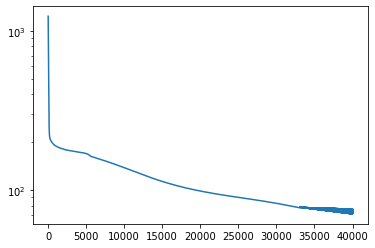

In [18]:
plt.semilogy(total_loss)
plt.show()